### K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Manish Yadav
#### raomaniyadav@gmail.com

In [59]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [60]:
#load data set iris
from sklearn.datasets import load_iris

In [61]:
iris=load_iris()

In [62]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [63]:
data=pd.DataFrame(iris["data"],columns=iris["feature_names"])

In [64]:
x=data.iloc[:,[0,1,2,3]].values

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [65]:
from sklearn.cluster import KMeans #import cluster model 

In [66]:
# Finding the optimum number of clusters for k-means classification
iner=[]
for i in range(1, 11):
    model = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init = 10)
    model.fit(x)
    iner.append(model.inertia_)


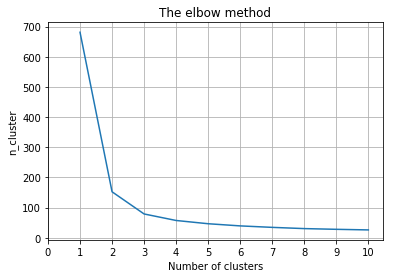

In [67]:
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), iner)
plt.title('The elbow method')
plt.xticks(range(0,11,1))
plt.xlabel('Number of clusters')
plt.ylabel('n_cluster')
plt.grid()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [68]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10,)
y_pred = kmeans.fit_predict(x)

In [69]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [70]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

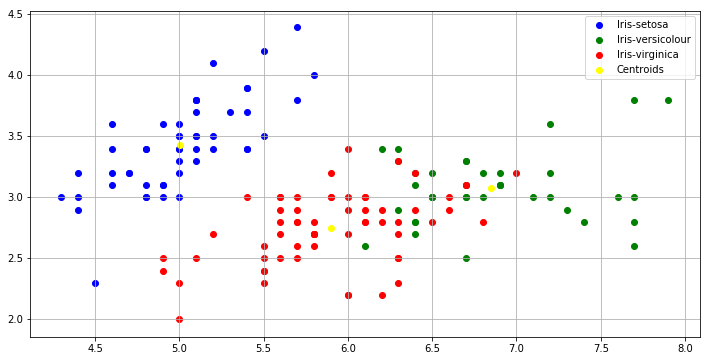

In [85]:
plt.figure(figsize=(12,6))
plt.scatter(x[y_pred== 0][:,0], x[y_pred == 0][:,1], c='blue',label ='Iris-setosa')
plt.scatter(x[y_pred == 1][:,0], x[y_pred == 1][:,1],c='green',label='Iris-versicolour')
plt.scatter(x[y_pred == 2][:,0], x[y_pred == 2][:,1],c='red',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='yellow',label ='Centroids')
plt.grid()
plt.legend()
plt.show()